id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

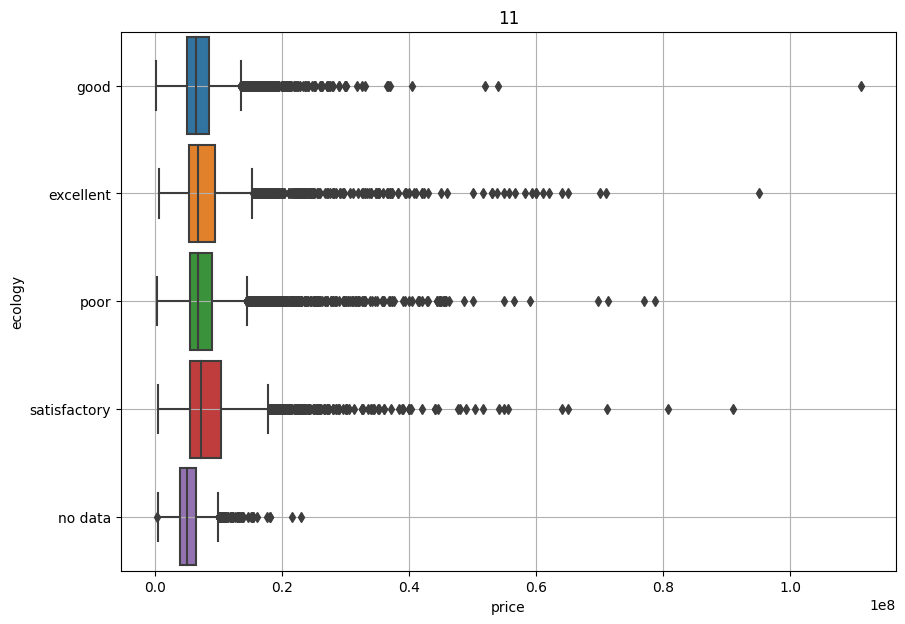

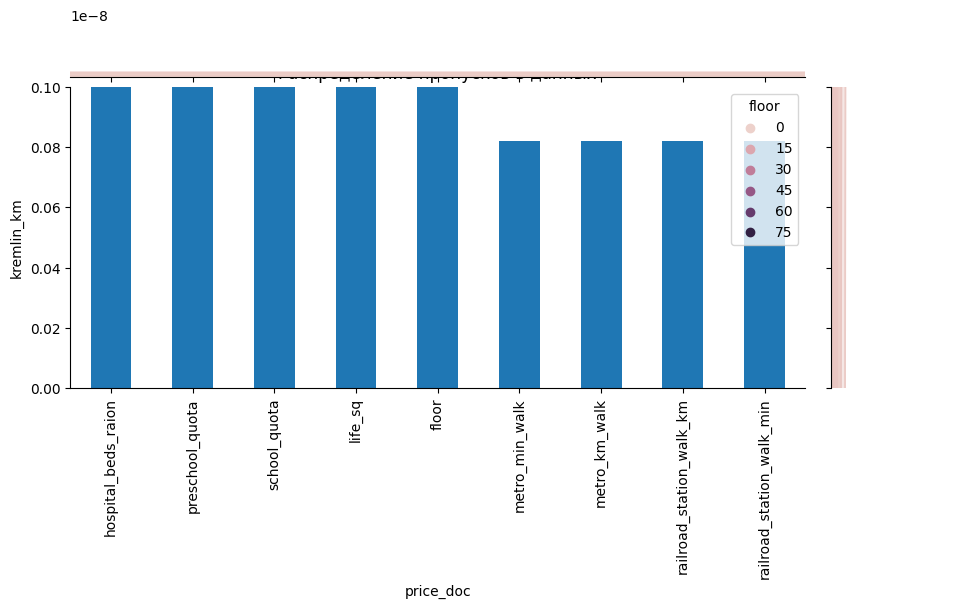

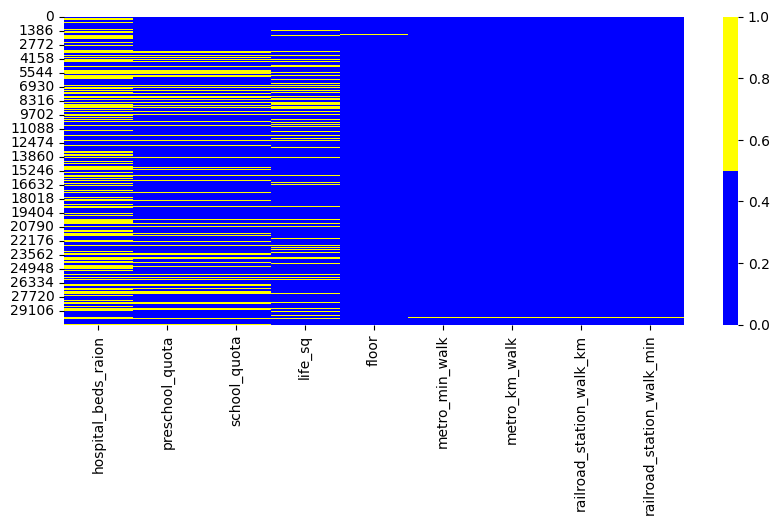

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

sber_data = pd.read_csv('C:\Temp\Pythone/sber_data.csv')
#sber_data.head()
#print(sber_data['sub_area'].nunique())
#sber_data['price_doc'].max()

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)
boxplot.set_title('11');
boxplot.set_xlabel('price');
boxplot.set_ylabel('ecology');
boxplot.grid()
!pip install psycopg2
jointplot = sns.jointplot(
    data=sber_data, 
    x='price_doc', 
    y='kremlin_km',
    hue='floor',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)
#display(sber_data.isnull().tail())
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
#display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

#cols = cols_with_null.index
#sber_data[cols].hist(figsize=(20, 8));

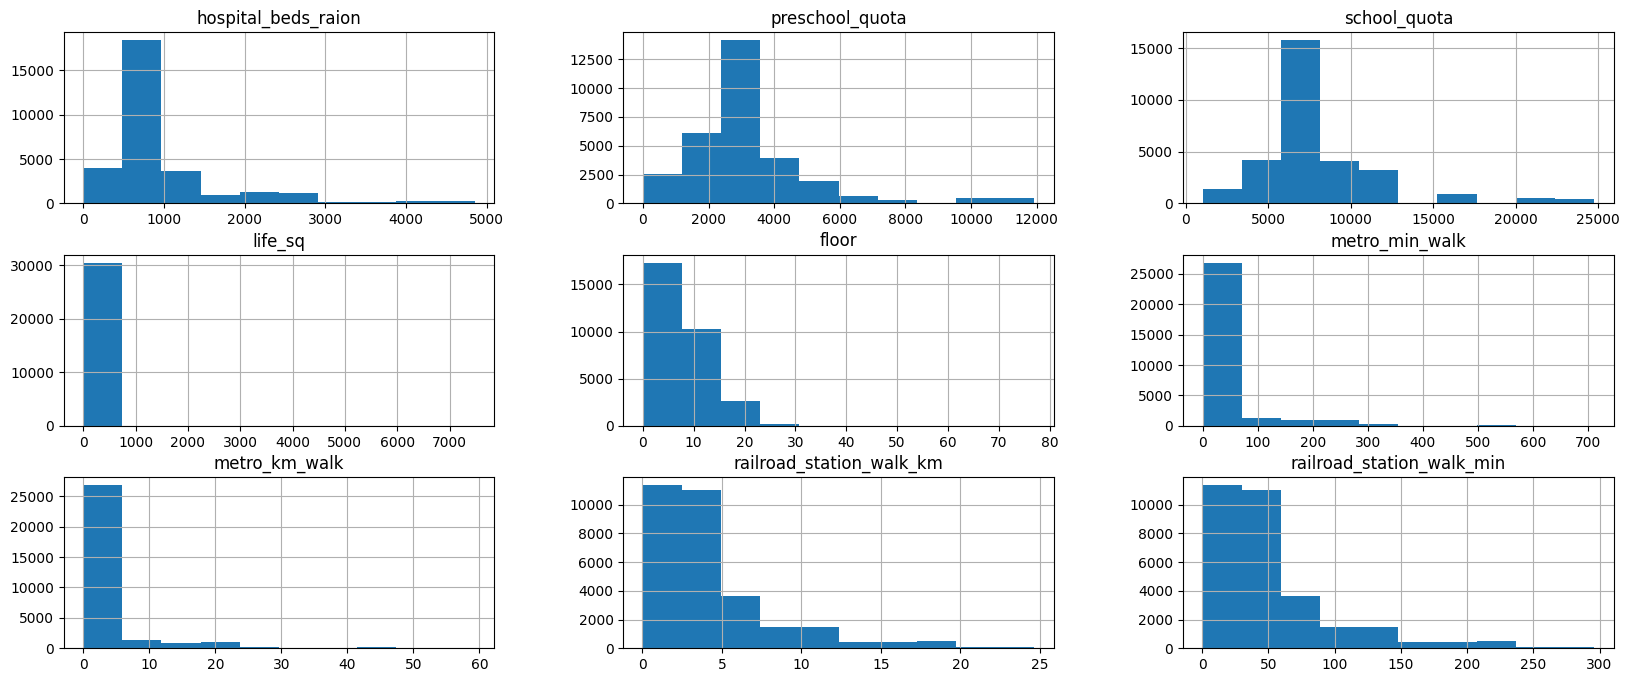

In [3]:
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

45


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


37
Результирующее число записей: 30434


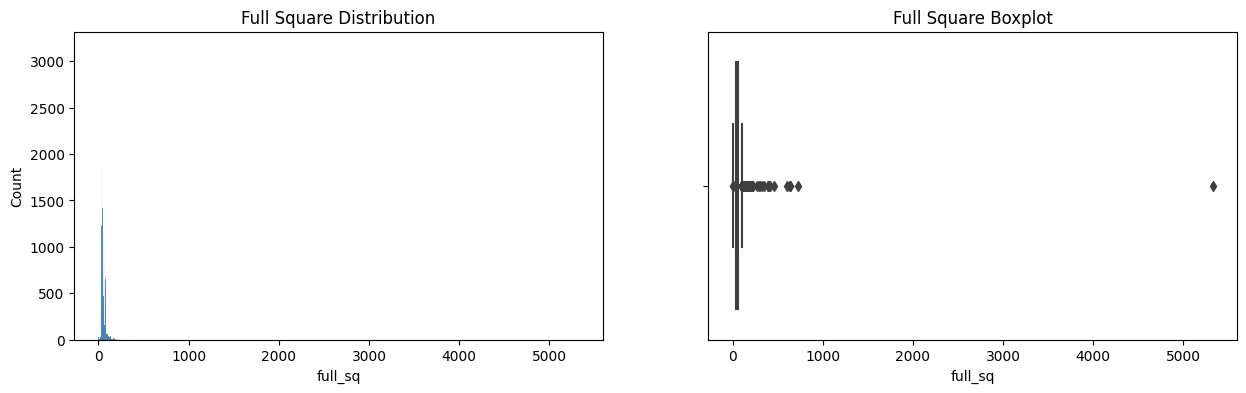

In [12]:
sber_data['life_sq'].describe()
print(sber_data[sber_data['life_sq'] == 0].shape[0])
display(sber_data[sber_data['life_sq'] > 7000])
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


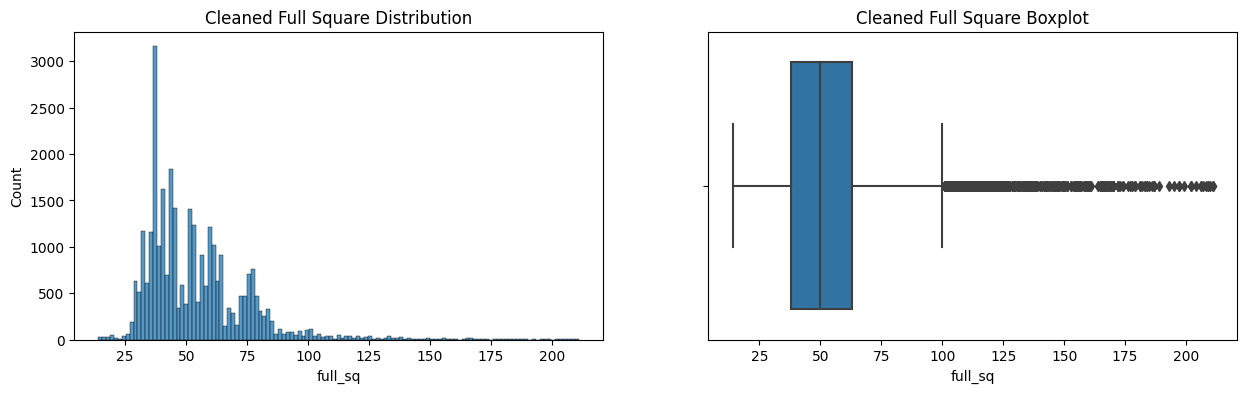

In [20]:
#def outliers_iqr(data, feature):
#   x = data[feature]
#    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
#   iqr = quartile_3 - quartile_1
#    lower_bound = quartile_1 - (iqr * 1.5)
#    upper_bound = quartile_3 + (iqr * 1.5)
#    outliers = data[(x<lower_bound) | (x > upper_bound)]
#    cleaned = data[(x>lower_bound) & (x < upper_bound)]
#    return outliers, cleaned
#outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
#print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
#print(f'Результирующее число записей: {cleaned.shape[0]}')

#Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() 
# к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. 
# Чему равно результирующее число выбросов в данных?

def outliers_iqr_mod(data, feature, left=1, right=6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod( sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471
[]


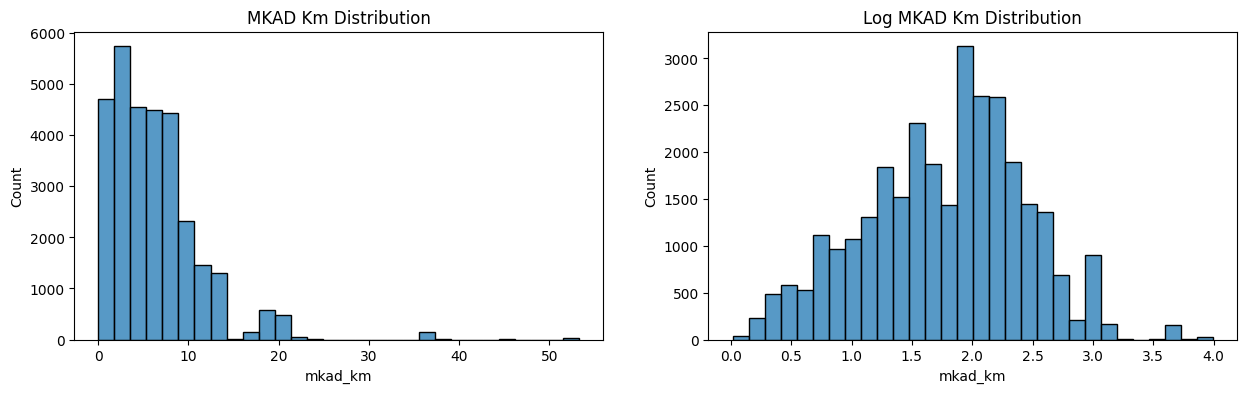

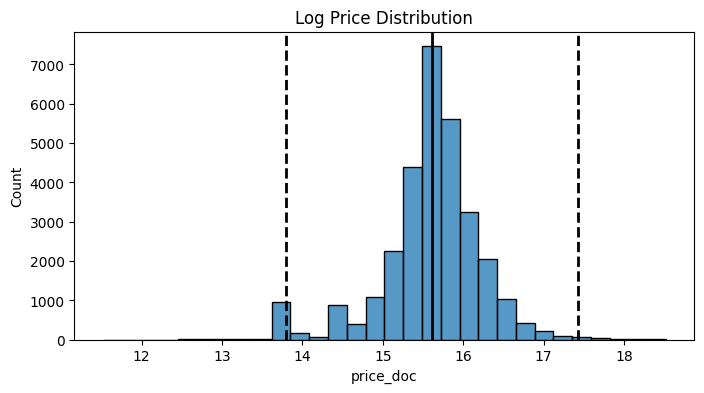

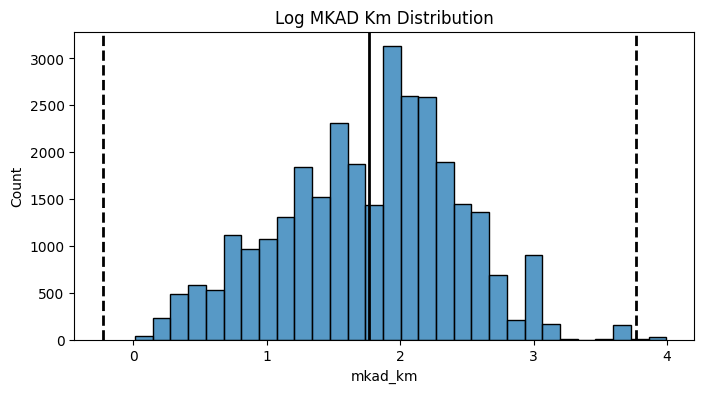

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
#print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
#print(f'Результирующее число записей: {cleaned.shape[0]}')
#print(outliers['sub_area'].unique())

def outliers_z_score_mod(data, feature, log_scale=True, left=3, right=3.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(outliers['sub_area'].unique())
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.set_title('Log Price Distribution');
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2);

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

#Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score() параметры left и right, 
# которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. 
# По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod().

In [51]:


#6.7
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')



Число выбросов по методу Тьюки: 92


In [56]:
#Дубликаты
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
    information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Число найденных дубликатов: 562
Результирующее число записей: 29909
id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
Результирующее число признаков: 55


Outcome: 65.1% одинаковых значений
Gender: 100.0% одинаковых значений
Число выбросов по методу Тьюки: 1
Результирующее число записей: 767


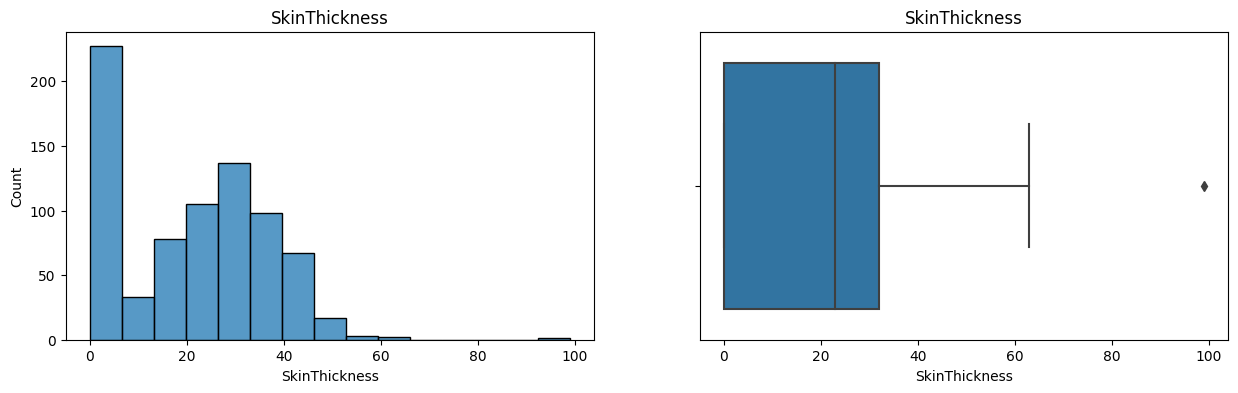

In [129]:
#8
diabetes = pd.read_csv('C:/Temp/Pythone/diabetes_data.csv')
diabetes.head()
#Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте 
#все признаки в данных. Сколько записей осталось в данных?
dupl_columns = list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
#print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
#print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')
#Задание 8.2 Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: 
# удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, 
# которые вы нашли (без кавычек).
#Примечание: дальнейшая работа производится с очищенными от дубликатов и неинформативных признаков данных.

low_information_cols = [] 
#цикл по всем столбцам
for col in diabetes_dedupped .columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped [col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped [col].nunique() / diabetes_dedupped [col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.65:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
information_diabetes = diabetes_dedupped .drop(low_information_cols, axis=1)
#print(f'Результирующее число признаков: {information_diabetes.shape[1]}')

#Задание 8.3
#Попробуйте найти пропуски в данных с помощью метода isnull().
#Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. 
# Его вы можете взять из библиотеки numpy: np.nan.
#Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

def chto_na(num):
    if num == 0:
        return np.nan
    else:
        return num

#information_diabetes1['a'] = diabetes['Insulin'].apply(chto_na)
#print((information_diabetes1['a'].isnull()).value_counts())
#Задание 8.4
#Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
#ОтправитьВ некоторых задачах доступны следующие действия: сохранение, сброс, показ подсказки или ответа. Соответствующие кнопки 
# расположены рядом с кнопкой «Отправить».

#Задание 8.5
#Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?
m = information_diabetes .shape[1]
diabetes = information_diabetes .dropna(thresh=m-2, axis=0)
#print(diabetes.shape[0])
#Задание 8.6
#В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

#fill_data=diabetes
#fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
#fill_data.isnull().mean()

#Задание 8.7
#Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
#Примечание: дальнейшая работа производится с очищенными от дубликатов, неинформативных признаков данных и пропусков.

diabetes['SkinThickness'].describe()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=diabetes, x='SkinThickness', ax=axes[0]);
histplot.set_title('SkinThickness');
boxplot = sns.boxplot(data=diabetes, x='SkinThickness', ax=axes[1]);
boxplot.set_title('SkinThickness');

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
#Задание 8.8
#Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?
#ОтправитьВ некоторых задачах доступны следующие действия: сохранение, сброс, показ подсказки или ответа. Соответствующие кнопки расположены рядом с кнопкой «Отправить».
#Задание 8.9
#На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, 
# и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

#Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
# Какова разница между двумя этими числами (вычтите из первого второе)?

In [45]:
#Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. 
# Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. 
# Сколько выбросов вы получили?
def outliers_z_score_mod1(data, feature, log_scale=True, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod1(sber_data, 'price_doc', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(outliers['sub_area'].unique())

Число выбросов по методу z-отклонения: 146
Результирующее число записей: 30325
['Juzhnoe Tushino' 'Krylatskoe' 'Obruchevskoe' "Kon'kovo"
 'Horoshevo-Mnevniki' 'Nekrasovka' 'Matushkino' 'Kotlovka'
 "Tekstil'shhiki" 'Tverskoe' 'Otradnoe' 'Beskudnikovskoe' 'Savelki'
 'Mitino' 'Horoshevskoe' 'Fili Davydkovo' 'Hamovniki' 'Alekseevskoe'
 'Krjukovo' 'Nagatinskij Zaton' 'Novo-Peredelkino' 'Teplyj Stan'
 'Ljublino' 'Sokolinaja Gora' 'Caricyno' "Mar'ina Roshha"
 'Severnoe Medvedkovo' 'Staroe Krjukovo' 'Mozhajskoe' 'Jakimanka'
 'Pokrovskoe Streshnevo' 'Zjuzino' 'Ramenki' 'Meshhanskoe'
 'Prospekt Vernadskogo' 'Taganskoe' "Mar'ino" 'Shhukino' 'Donskoe'
 'Lomonosovskoe' 'Strogino' 'Vojkovskoe' "Sokol'niki" 'Presnenskoe'
 "Gol'janovo" 'Rostokino' "Zamoskvorech'e" 'Basmannoe' 'Arbat'
 'Cheremushki' 'Akademicheskoe' 'Troickij okrug' 'Danilovskoe' 'Ajeroport'
 'Kuncevo' 'Gagarinskoe' 'Severnoe Butovo']


In [4]:
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [6]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
#Выведем результирующее число строк и столбцов:

print(combine_data.shape)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)
